In [1]:
import pandas as pd

In [2]:
# Download data
df = pd.read_excel("marketing_campaign.xlsx")
df = df.dropna().reset_index(drop=True)
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


# Clean and Set Up Data

In [3]:
#Remove ID Column
del df['ID']

# creating Year, Month, Age column for further analysis
from datetime import datetime as dt

# convert the 'Date' column to datetime format
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

# create Year, Month, Day columns
df['Year'] = df["Dt_Customer"].dt.year
df['Month'] = df["Dt_Customer"].dt.month

#create Age column 
age_group = []
for i in df["Year_Birth"]:
    if i <= 1959:
        age_group.append("Elderly")
    elif i > 1959 and i <=1977:
        age_group.append("MiddleAge")
    else:
        age_group.append("Young")
df["Age_group"] = age_group

df["Age"] = 2022 - df["Year_Birth"]

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Age_group,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,3,11,1,2012,9,Elderly,65
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,3,11,0,2014,3,Elderly,68
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,3,11,0,2013,8,MiddleAge,57
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,3,11,0,2014,2,Young,38
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,3,11,0,2014,1,Young,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,3,11,0,2013,6,MiddleAge,55
2212,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,1,0,0,3,11,0,2014,6,Elderly,76
2213,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,3,11,0,2014,1,Young,41
2214,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,3,11,0,2014,1,Elderly,66


In [4]:
# Factorize categorical variable Education
lables,uniques = pd.factorize(df["Education"])
df["Educ_group"] = lables
df['Educ_group'].mask( df['Educ_group'] ==3, 0 , inplace=True)
df['Educ_group'].mask( df['Educ_group'] ==4, 2 , inplace=True)
df.groupby('Educ_group')['Educ_group'].count()

# Graduation+Basic: 0
# PhD: 1
# Master+2n Cylce: 2

Educ_group
0    1170
1     481
2     565
Name: Educ_group, dtype: int64

In [5]:
# Factorize categorical variable Marital_Status
lables,uniques = pd.factorize(df["Marital_Status"])
df["Marital_group"] = lables
df['Marital_group'].mask( df['Marital_group'] > 3, 3 , inplace=True )
df.groupby('Marital_group')['Marital_group'].count()

# Single: 0
# Together: 1
# Married: 2
# Divorce or others:3 

Marital_group
0    471
1    573
2    857
3    315
Name: Marital_group, dtype: int64

In [6]:
# Factorize categorical variable Age
lables,uniques = pd.factorize(df["Age_group"])
uniques

# Elderly: 0
# MiddleAge: 1
# Young: 2

Index(['Elderly', 'MiddleAge', 'Young'], dtype='object')

In [7]:
df["Age_group"] = lables
df.groupby('Age_group')['Age_group'].count()

Age_group
0     562
1    1106
2     548
Name: Age_group, dtype: int64

In [8]:
lst = []

for i in range(len(df.index)):
    if df["AcceptedCmp1"][i] == 1 or df["AcceptedCmp2"][i] == 1 or df["AcceptedCmp2"][i] == 1 or \
        df["AcceptedCmp3"][i] == 1 or df["AcceptedCmp4"][i] == 1:
        lst.append(1)
    else:
        lst.append(0)

df["Offer"] = lst
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Z_CostContact,Z_Revenue,Response,Year,Month,Age_group,Age,Educ_group,Marital_group,Offer
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,3,11,1,2012,9,0,65,0,0,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,3,11,0,2014,3,0,68,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,3,11,0,2013,8,1,57,0,1,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,3,11,0,2014,2,2,38,0,1,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,11,0,2014,1,2,41,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,3,11,0,2013,6,1,55,0,2,0
2212,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,3,11,0,2014,6,0,76,1,1,1
2213,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,3,11,0,2014,1,2,41,0,3,1
2214,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,3,11,0,2014,1,0,66,2,1,0


# Data Models

In [9]:
import numpy as np
import pandas as pd
import pymc3 as pm
from pymc3 import Model, sample, Normal, HalfCauchy, Uniform, model_to_graphviz
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [10]:
# Predictor Variable Values
Education = df["Education"].values
Marital_Status = df["Marital_Status"].values
Age = df["Age"].values

Educ_group = df["Educ_group"].values
Marital_group = df["Marital_group"].values
Age_group = df["Age_group"].values

Income = df["Income"].values
Kidhome = df["Kidhome"].values
Teenhome = df["Teenhome"].values
Recency = df["Recency"].values
MntWines = df["MntWines"].values
MntFruits = df["MntFruits"].values
MntMeatProducts = df["MntMeatProducts"].values
MntFishProducts = df["MntFishProducts"].values
MntSweetProducts = df["MntSweetProducts"].values
MntGoldProds = df["MntGoldProds"].values
NumDealsPurchases = df["NumDealsPurchases"].values
NumWebPurchases = df["NumWebPurchases"].values
NumCatalogPurchases = df["NumCatalogPurchases"].values
NumStorePurchases = df["NumStorePurchases"].values
NumWebVisitsMonth = df["NumWebVisitsMonth"].values
AcceptedCmp1 = df["AcceptedCmp1"].values
AcceptedCmp2 = df["AcceptedCmp2"].values
AcceptedCmp3 = df["AcceptedCmp3"].values
AcceptedCmp4 = df["AcceptedCmp4"].values
AcceptedCmp5 = df["AcceptedCmp5"].values
Complain = df["Complain"].values


# Date Values
Year = df["Year"].values
Month = df["Month"].values

# Response Variable
Offer = df["Offer"].values

## Bayesian Logistic Model

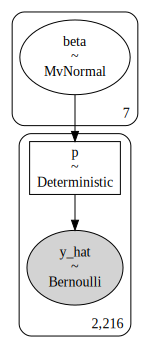

In [200]:
with Model() as manual_logistic_model:
    Y = df["Offer"]
    k=6
    beta = pm.MvNormal('beta', mu = np.zeros(k+1), cov = np.eye(k+1), shape = k+1)
    
    μ = beta[0] + beta[1]*Educ_group + beta[2]*Marital_group + beta[3]*Income \
            + beta[4]*Kidhome + beta[5]*Recency + beta[6]*Age_group
   
    p = pm.Deterministic('p',  pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=p, observed=Y) 

pm.model_to_graphviz(manual_logistic_model)

In [201]:
with manual_logistic_model:
    kwargs = {'target_accept':0.85}
    step = pm.NUTS(**kwargs)
    pooled_trace = pm.sample(1000, tune=3000, step = step, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 96 seconds.


In [202]:
az.summary(pooled_trace, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],-2.35,0.25,-2.82,-1.89,0.01,0.0,2094.92,2349.86,1.0
beta[1],-0.00,0.07,-0.13,0.12,0.00,0.0,4275.48,2923.90,1.0
beta[2],0.01,0.06,-0.10,0.12,0.00,0.0,4208.67,2828.14,1.0
beta[3],0.00,0.00,0.00,0.00,0.00,0.0,2564.57,2328.42,1.0
beta[4],-0.50,0.14,-0.76,-0.25,0.00,0.0,3133.20,2662.89,1.0
...,...,...,...,...,...,...,...,...,...
p[2211],0.23,0.02,0.20,0.26,0.00,0.0,3620.20,3471.30,1.0
p[2212],0.10,0.02,0.05,0.14,0.00,0.0,3204.32,2357.05,1.0
p[2213],0.22,0.03,0.16,0.28,0.00,0.0,3630.39,3082.39,1.0
p[2214],0.26,0.03,0.20,0.31,0.00,0.0,4032.48,3000.26,1.0


C:\Users\PC\AppData\Local\Temp\ipykernel_5912\4178015912.py:3: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(pooled_trace, var_names=['beta']);


<Figure size 432x504 with 0 Axes>

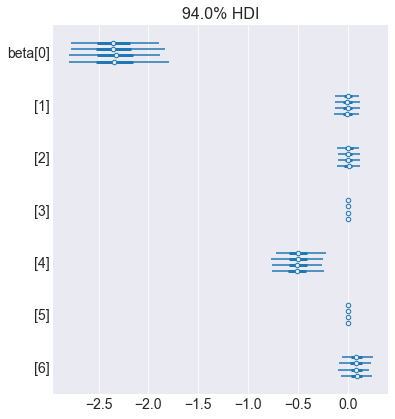

In [203]:
with manual_logistic_model:
    plt.figure(figsize=(6,7))
    pm.forestplot(pooled_trace, var_names=['beta']);

## Partial Pooling Model

# 1. Marital Status

In [11]:
maritalstatus = df["Marital_group"].unique()
maritalstatuses = len(maritalstatus)

marital = df["Marital_group"]
df.groupby('Marital_group')['Marital_group'].count()

# Single: 0
# Together: 1
# Married: 2
# Divorce or others:3 

Marital_group
0    471
1    573
2    857
3    315
Name: Marital_group, dtype: int64

C:\Users\PC\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma_a, mu_a]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 56 seconds.
There were 1670 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5625042340946061, but should be close to 0.8. Try to increase the number of tuning steps.
There were 453 divergences after tuning. Increase `target_accept` or reparameterize.
There were 645 divergences after tuning. Increase `target_accept` or reparameterize.
There were 605 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.711547090396352, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


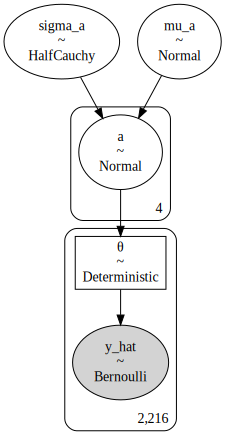

In [12]:
with Model() as partial_pooling_marital:

    # Priors
    mu_a = pm.Normal('mu_a', mu=0., sd=1e5)
    sigma_a = pm.HalfCauchy('sigma_a', 5)
    
    # Random intercepts based on marital status
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=maritalstatuses)

    # Model
    μ = a[marital] 

    # Data likelihood
    θ = pm.Deterministic('θ', pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=θ, observed=Offer)
    
    # Sample the posterior
    trace_pp = pm.sample(draws=10000, cores = 4)

pm.model_to_graphviz(partial_pooling_marital)

In [13]:
with partial_pooling_marital:
    partial_pooling_trace = pm.sample(2000, cores = 4, tune=1000)
    partial_pooled_idata = az.from_pymc3(partial_pooling_trace)
az.summary(partial_pooled_idata, round_to=2)

C:\Users\PC\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma_a, mu_a]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 24 seconds.
There were 166 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6377537877044852, but should be close to 0.8. Try to increase the number of tuning steps.
There were 62 divergences after tuning. Increase `target_accept` or reparameterize.
There were 78 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1096 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3582376256954784, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_a,-1.52,0.11,-1.70,-1.32,0.01,0.00,72.49,1463.46,1.05
a[0],-1.51,0.09,-1.66,-1.34,0.01,0.01,74.80,3159.59,1.04
a[1],-1.56,0.08,-1.71,-1.39,0.01,0.00,134.67,3055.53,1.03
a[2],-1.51,0.07,-1.63,-1.38,0.01,0.01,35.18,3326.04,1.08
a[3],-1.50,0.10,-1.68,-1.30,0.02,0.01,29.36,3008.23,1.09
...,...,...,...,...,...,...,...,...,...
θ[2211],0.18,0.01,0.16,0.20,0.00,0.00,35.18,3326.04,1.08
θ[2212],0.17,0.01,0.15,0.20,0.00,0.00,134.67,3055.53,1.03
θ[2213],0.18,0.02,0.16,0.21,0.00,0.00,29.36,3008.23,1.09
θ[2214],0.17,0.01,0.15,0.20,0.00,0.00,134.67,3055.53,1.03


C:\Users\PC\AppData\Local\Temp\ipykernel_21200\3563462438.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(partial_pooling_trace)


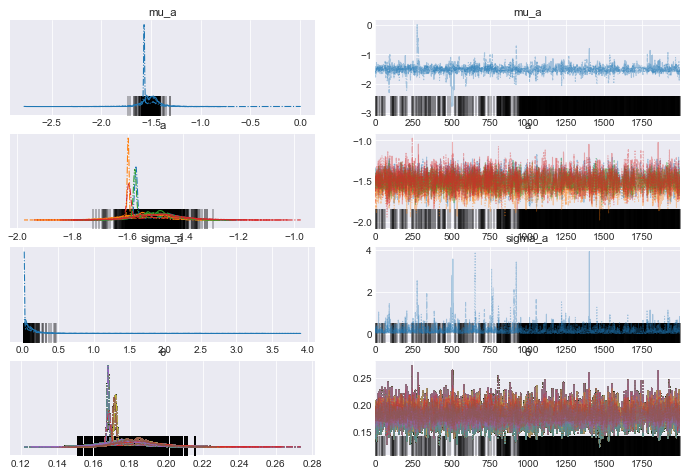

In [14]:
with partial_pooling_marital:
    pm.traceplot(partial_pooling_trace)

C:\Users\PC\AppData\Local\Temp\ipykernel_21200\1687972045.py:3: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(partial_pooling_trace, var_names=['a']);


<Figure size 432x1296 with 0 Axes>

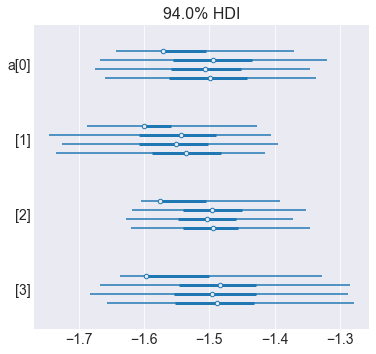

In [15]:
with partial_pooling_marital:
    plt.figure(figsize=(6,18))
    pm.forestplot(partial_pooling_trace, var_names=['a']);
    
# Single: 0
# Together: 1
# Married: 2
# Divorce or others:3 

# 2. Education

In [209]:
edu = df["Educ_group"].unique()
edu_count = len(edu)

educ = df["Educ_group"]
df.groupby('Educ_group')['Educ_group'].count()

# Graduation+Basic: 0
# PhD: 1
# Master+2n Cylce: 2

Educ_group
0    1170
1     481
2     565
Name: Educ_group, dtype: int64

C:\Users\PC\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma_a, mu_a]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 54 seconds.
There were 2098 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.601972250177317, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1074 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1241 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6856920685139408, but should be close to 0.8. Try to increase the number of tuning steps.
There were 819 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


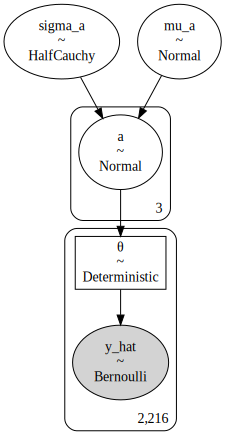

In [210]:
with Model() as partial_pooling_education:

    # Priors
    mu_a = pm.Normal('mu_a', mu=0., sd=1e5)
    sigma_a = pm.HalfCauchy('sigma_a', 5)

    # Random intercepts based on education
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=edu_count)

    # Model
    μ = a[educ] 

    # Data likelihood
    θ = pm.Deterministic('θ', pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=θ, observed=Offer)
    
    # Sample the posterior
    trace_pp = pm.sample(draws=10000, cores = 4)

pm.model_to_graphviz(partial_pooling_education)

In [211]:
with partial_pooling_education:
    partial_pooling_trace = pm.sample(2000, cores = 4, tune=1000)
    partial_pooled_idata = az.from_pymc3(partial_pooling_trace)
az.summary(partial_pooled_idata, round_to=2)

C:\Users\PC\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma_a, mu_a]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 26 seconds.
There were 311 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6811180148619129, but should be close to 0.8. Try to increase the number of tuning steps.
There were 166 divergences after tuning. Increase `target_accept` or reparameterize.
There were 315 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.618751234797044, but should be close to 0.8. Try to increase the number of tuning steps.
There were 127 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_a,-1.47,0.51,-2.21,-0.74,0.02,0.01,2074.86,1297.95,1.01
a[0],-1.55,0.08,-1.69,-1.40,0.00,0.00,1190.05,583.17,1.00
a[1],-1.35,0.11,-1.54,-1.14,0.00,0.00,605.98,1098.24,1.01
a[2],-1.58,0.10,-1.78,-1.39,0.00,0.00,1359.48,2108.88,1.00
sigma_a,0.52,0.83,0.04,1.63,0.03,0.02,268.65,250.64,1.01
...,...,...,...,...,...,...,...,...,...
θ[2211],0.17,0.01,0.16,0.20,0.00,0.00,1190.05,583.17,1.00
θ[2212],0.21,0.02,0.18,0.24,0.00,0.00,605.98,1098.24,1.01
θ[2213],0.17,0.01,0.16,0.20,0.00,0.00,1190.05,583.17,1.00
θ[2214],0.17,0.01,0.14,0.20,0.00,0.00,1359.48,2108.88,1.00


C:\Users\PC\AppData\Local\Temp\ipykernel_5912\3198456329.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(partial_pooling_trace)


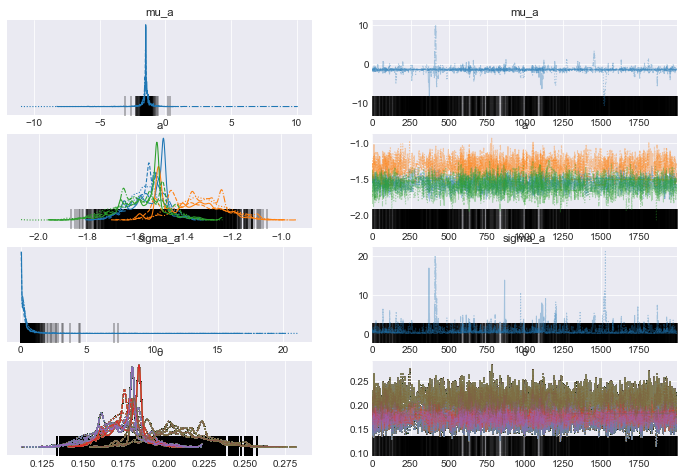

In [117]:
with partial_pooling_education:
    pm.traceplot(partial_pooling_trace)

C:\Users\PC\AppData\Local\Temp\ipykernel_5912\391480298.py:5: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(partial_pooling_trace, var_names=['a']);


<Figure size 432x1296 with 0 Axes>

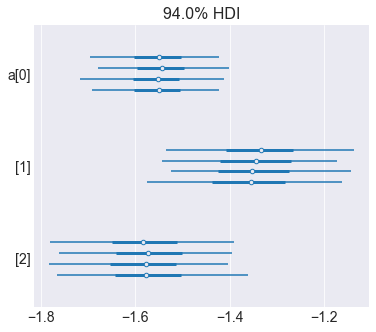

In [212]:
with partial_pooling_education:
    plt.figure(figsize=(6,18))
    pm.forestplot(partial_pooling_trace, var_names=['a']);
    
# Graduation+Basic: 0
# PhD: 1
# Master+2n Cylce: 2

# 3. Age

In [215]:
age = df["Age_group"].unique()
age_count = len(age)

person_age = df["Age_group"]

C:\Users\PC\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma_a, mu_a]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 55 seconds.
There were 1019 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1076 divergences after tuning. Increase `target_accept` or reparameterize.
There were 873 divergences after tuning. Increase `target_accept` or reparameterize.
There were 806 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


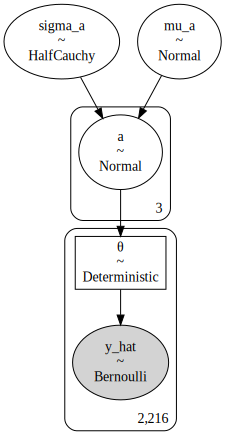

In [216]:
with Model() as partial_pooling_age:

    # Priors
    mu_a = pm.Normal('mu_a', mu=0., sd=1e5)
    sigma_a = pm.HalfCauchy('sigma_a', 5)

    # Random intercepts based on Age
    a = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=age_count)

    # Model
    μ = a[person_age] 

    # probability & likelihood
    θ = pm.Deterministic('θ', pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=θ, observed=Offer)
    
    # Sample the posterior
    trace_pp = pm.sample(draws=10000, cores = 4)

pm.model_to_graphviz(partial_pooling_age)

In [217]:
with partial_pooling_age:
    partial_pooling_trace = pm.sample(2000, cores = 4, tune=1000)
    partial_pooled_idata = az.from_pymc3(partial_pooling_trace)
az.summary(partial_pooled_idata, round_to=2)

C:\Users\PC\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, sigma_a, mu_a]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 27 seconds.
There were 130 divergences after tuning. Increase `target_accept` or reparameterize.
There were 184 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7050838711284054, but should be close to 0.8. Try to increase the number of tuning steps.
There were 937 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3836639418810488, but should be close to 0.8. Try to increase the number of tuning steps.
There were 134 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_a,-1.51,0.29,-1.95,-1.03,0.01,0.01,1136.34,1393.66,1.01
a[0],-1.44,0.10,-1.60,-1.25,0.02,0.01,26.59,9.59,1.10
a[1],-1.57,0.07,-1.71,-1.43,0.00,0.00,1216.12,2861.08,1.07
a[2],-1.51,0.09,-1.68,-1.32,0.01,0.00,301.68,1926.60,1.02
sigma_a,0.32,0.54,0.03,1.04,0.02,0.02,21.04,7.21,1.13
...,...,...,...,...,...,...,...,...,...
θ[2211],0.17,0.01,0.15,0.19,0.00,0.00,1216.12,2861.08,1.07
θ[2212],0.19,0.02,0.17,0.22,0.00,0.00,26.59,9.59,1.10
θ[2213],0.18,0.01,0.16,0.21,0.00,0.00,301.68,1926.60,1.02
θ[2214],0.19,0.02,0.17,0.22,0.00,0.00,26.59,9.59,1.10


C:\Users\PC\AppData\Local\Temp\ipykernel_5912\2937029305.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(partial_pooling_trace)


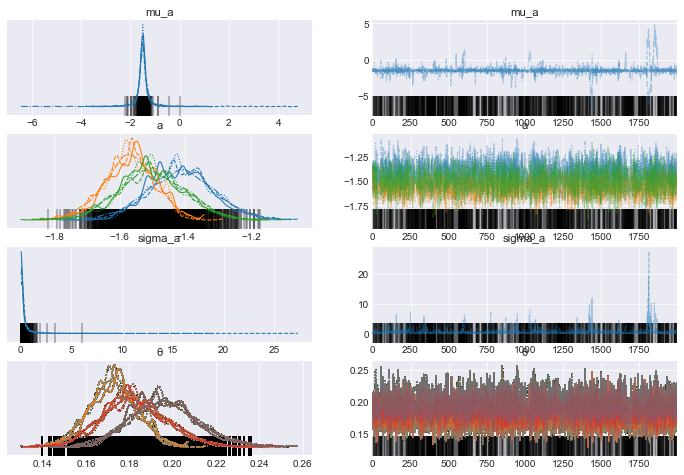

In [122]:
with partial_pooling_age:
    pm.traceplot(partial_pooling_trace)

C:\Users\PC\AppData\Local\Temp\ipykernel_5912\1819688985.py:5: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(partial_pooling_trace, var_names=['a']);


<Figure size 432x1296 with 0 Axes>

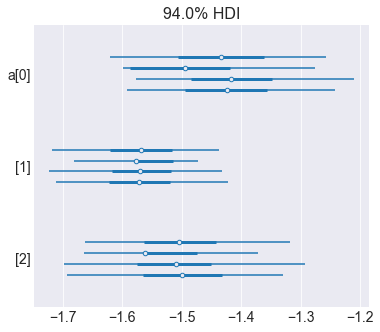

In [218]:
with partial_pooling_age:
    plt.figure(figsize=(6,18))
    pm.forestplot(partial_pooling_trace, var_names=['a']);
    
# Elderly: 0
# MiddleAge: 1
# Young: 2

## Hierarchical Model

# Age Split On Income

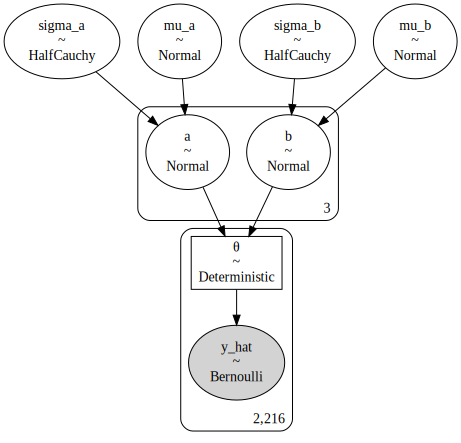

In [219]:
with Model() as varying_intercept_slope:
    Y = df["Offer"]
    
    # Priors
    mu_a = pm.Normal('mu_a', mu=0., sd=1e5)
    sigma_a =  pm.HalfCauchy('sigma_a', 1e5)
    mu_b = pm.Normal('mu_b', mu=0., sd=1e5)
    sigma_b =  pm.HalfCauchy('sigma_b', 1e5)

    # Random intercepts
    alpha = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=age_count)
    # Random slopes
    beta = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=age_count)
    
    # Model
    μ = alpha[person_age] + beta[person_age]*Income

    # Transform outcome to probability
    θ = pm.Deterministic('θ', pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=θ, observed=Y)

pm.model_to_graphviz(varying_intercept_slope)

In [220]:
with varying_intercept_slope:
    kwargs = {'target_accept':0.85}
    step = pm.NUTS(**kwargs)
    pooled_trace = pm.sample(1000, tune=3000, step = step, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma_b, mu_b, sigma_a, mu_a]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 95 seconds.
There were 118 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7396744331794471, but should be close to 0.85. Try to increase the number of tuning steps.
There were 165 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7072692395549919, but should be close to 0.85. Try to increase the number of tuning steps.
There were 252 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6235766608553337, but should be close to 0.85. Try to increase the number of tuning steps.
There were 90 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during

C:\Users\PC\AppData\Local\Temp\ipykernel_5912\3711102256.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(pooled_trace)


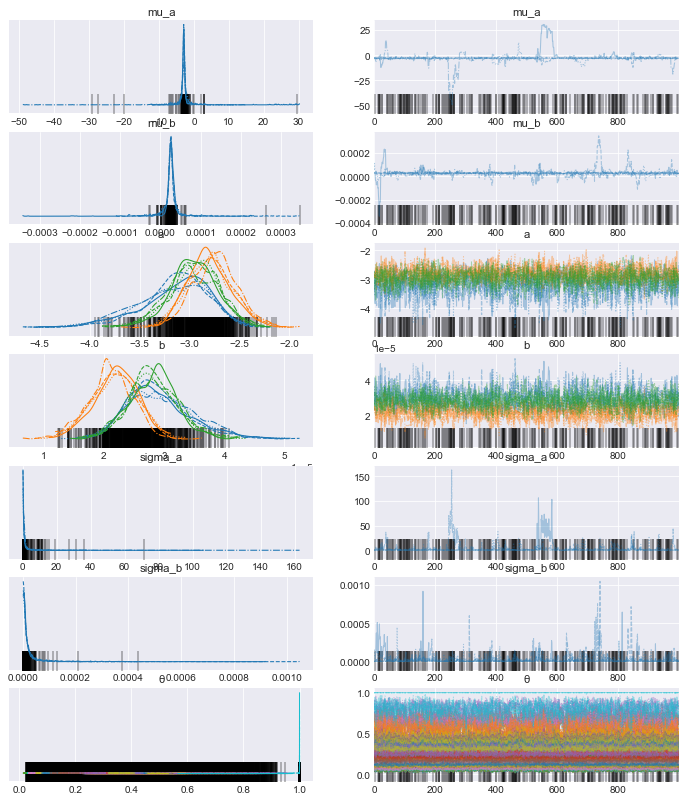

In [76]:
with varying_intercept_slope:
    pm.traceplot(pooled_trace)

C:\Users\PC\AppData\Local\Temp\ipykernel_5912\3755147996.py:5: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(pooled_trace, var_names=['a','b']);


<Figure size 432x1296 with 0 Axes>

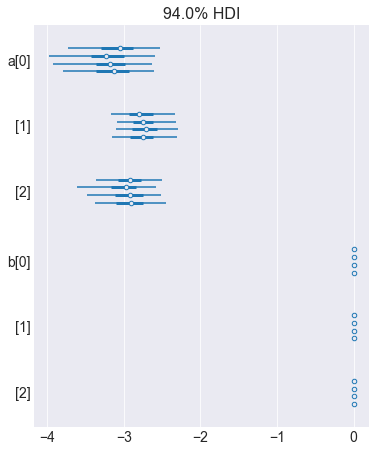

In [222]:
with varying_intercept_slope:
    plt.figure(figsize=(6,18))
    pm.forestplot(pooled_trace, var_names=['a','b']);

# Education Split on Income

In [223]:
with Model() as varying_intercept_slope:
    Y = df["Offer"]
    
    # Priors
    mu_a = pm.Normal('mu_a', mu=0., sd=1e5)
    sigma_a =  pm.HalfCauchy('sigma_a', 1e5)
    mu_b = pm.Normal('mu_b', mu=0., sd=1e5)
    sigma_b =  pm.HalfCauchy('sigma_b', 1e5)

    # Random intercepts
    alpha = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=edu_count)
    # Random slopes
    beta = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=edu_count)
    
    # Model
    μ = alpha[educ] + beta[educ]*Income

    # Transform outcome to probability
    θ = pm.Deterministic('θ', pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=θ, observed=Y)

In [224]:
with varying_intercept_slope:
    kwargs = {'target_accept':0.85}
    step = pm.NUTS(**kwargs)
    pooled_trace = pm.sample(1000, tune=3000, step = step, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma_b, mu_b, sigma_a, mu_a]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 87 seconds.
There were 260 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6050772074845021, but should be close to 0.85. Try to increase the number of tuning steps.
There were 223 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5738817593694512, but should be close to 0.85. Try to increase the number of tuning steps.
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
There were 225 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6192984990773669, but should be close to 0.85. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during

C:\Users\PC\AppData\Local\Temp\ipykernel_5912\3711102256.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(pooled_trace)


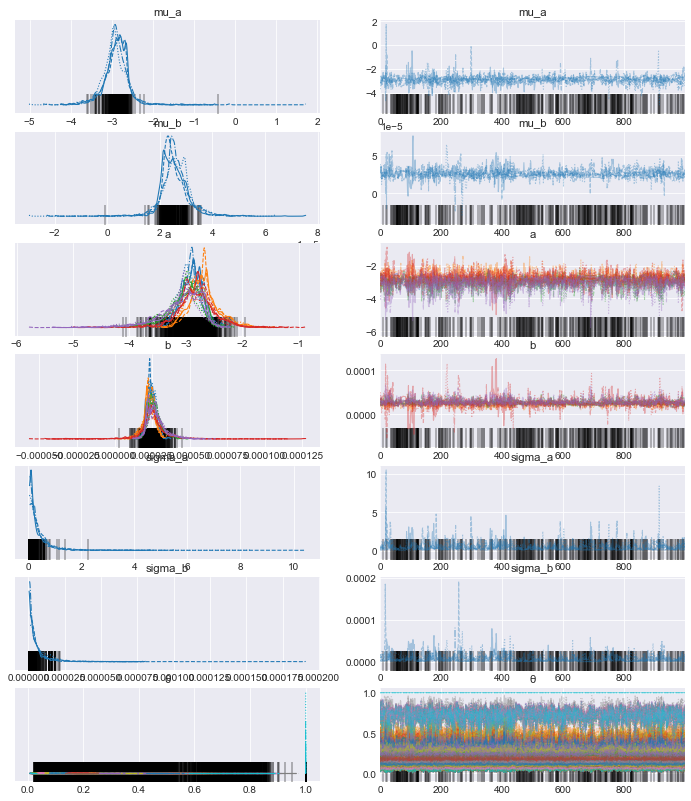

In [81]:
with varying_intercept_slope:
    pm.traceplot(pooled_trace)

C:\Users\PC\AppData\Local\Temp\ipykernel_5912\3755147996.py:5: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(pooled_trace, var_names=['a','b']);


<Figure size 432x1296 with 0 Axes>

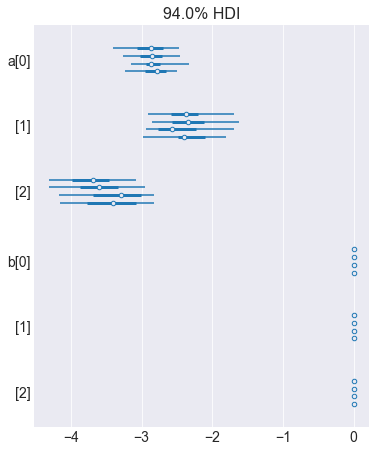

In [225]:
with varying_intercept_slope:
    plt.figure(figsize=(6,18))
    pm.forestplot(pooled_trace, var_names=['a','b']);

# Number of Kids Split on Income

In [226]:
kids = df["Kidhome"].unique()
kid_count = len(kids)

kidshome = df["Kidhome"]

In [227]:
with Model() as varying_intercept_slope:
    Y = df["Offer"]
    
    # Priors
    mu_a = pm.Normal('mu_a', mu=0., sd=1e5)
    sigma_a =  pm.HalfCauchy('sigma_a', 1e5)
    mu_b = pm.Normal('mu_b', mu=0., sd=1e5)
    sigma_b =  pm.HalfCauchy('sigma_b', 1e5)

    # Random intercepts
    alpha = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=kid_count)
    # Random slopes
    beta = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=kid_count)
    
    # Model
    μ = alpha[kidshome] + beta[kidshome]*Income
    
    # Transform outcome to probability
    θ = pm.Deterministic('θ', pm.invlogit(μ))
    y_hat = pm.Bernoulli('y_hat', p=θ, observed=Y)

In [228]:
with varying_intercept_slope:
    kwargs = {'target_accept':0.85}
    step = pm.NUTS(**kwargs)
    pooled_trace = pm.sample(1000, tune=3000, step = step, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma_b, mu_b, sigma_a, mu_a]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 111 seconds.
There were 424 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.41307157873565903, but should be close to 0.85. Try to increase the number of tuning steps.
There were 239 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5901619261111568, but should be close to 0.85. Try to increase the number of tuning steps.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9207915302897516, but should be close to 0.85. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samp

C:\Users\PC\AppData\Local\Temp\ipykernel_5912\3711102256.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(pooled_trace)


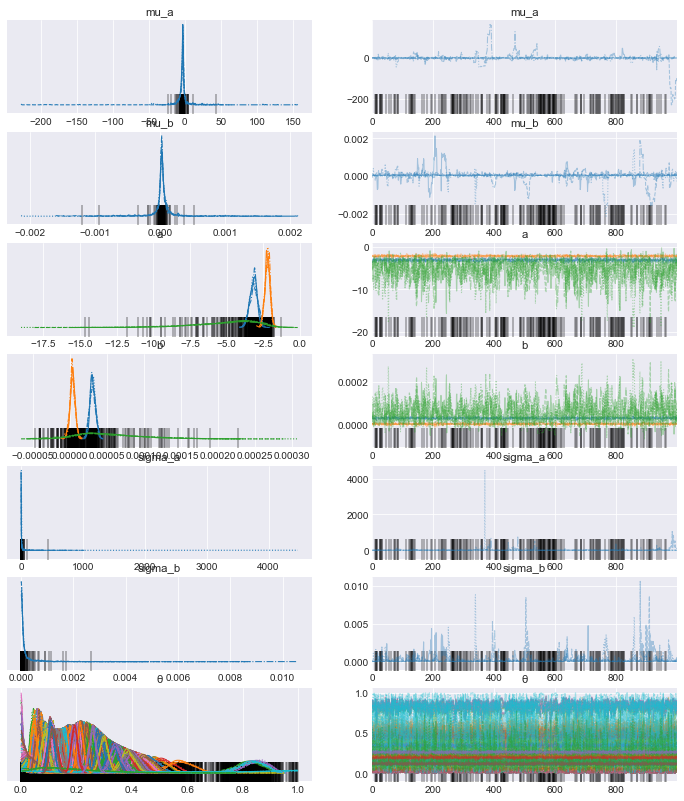

In [91]:
with varying_intercept_slope:
    pm.traceplot(pooled_trace)

C:\Users\PC\AppData\Local\Temp\ipykernel_5912\3755147996.py:5: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(pooled_trace, var_names=['a','b']);


<Figure size 432x1296 with 0 Axes>

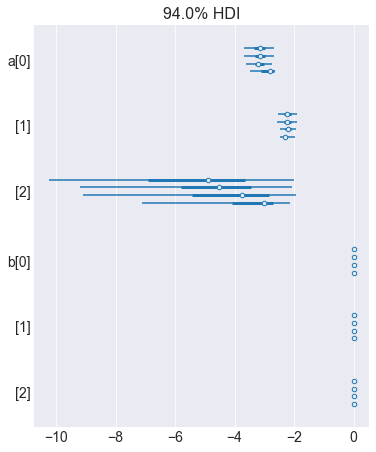

In [229]:
with varying_intercept_slope:
    plt.figure(figsize=(6,18))
    pm.forestplot(pooled_trace, var_names=['a','b']);